Formação Cientista de Dados II - Avaliação de Modelos parte I Random Forest
Prof. Fernando Amaral

# Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Carregar a base

In [19]:
#dados de concessão de crédito
credito = pd.read_csv('/Users/samuelhericlis/Desktop/IBM/cursos/formacao_cientista_de_dados_II_topicos_avançados/CIENTISTADADOS2/Dados/8.Classes Desbalanceada/Credit3.csv', sep=";")
display(credito.head())
credito.info()


,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
3,4,<0,existing paid,42,7882,2,4,45,1,2,1
4,5,<0,delayed previously,24,4870,3,4,53,2,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      1000 non-null   int64 
 1   checking_status         1000 non-null   object
 2   credit_history          1000 non-null   object
 3   duration                1000 non-null   int64 
 4   credit_amount           1000 non-null   int64 
 5   installment_commitment  1000 non-null   int64 
 6   residence_since         1000 non-null   int64 
 7   age                     1000 non-null   int64 
 8   existing_credits        1000 non-null   int64 
 9   num_dependents          1000 non-null   int64 
 10  class                   1000 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 86.1+ KB


# Tratar a base

Labeling enconde

In [20]:
#contamos a classe
credito.groupby(['class'])['class'].count()

class
0    300
1    700
Name: class, dtype: int64

In [21]:
#separação de previsões de classe
previsores = credito.iloc[:,1:10].values
classe = credito.iloc[:,10].values
previsores

array([['<0', 'critical/other existing credit', 6, ..., 67, 2, 1],
       ['0<=X<200', 'existing paid', 48, ..., 22, 1, 1],
       ['no checking', 'critical/other existing credit', 12, ..., 49, 1,
        2],
       ...,
       ['no checking', 'existing paid', 12, ..., 38, 1, 1],
       ['<0', 'existing paid', 45, ..., 23, 1, 1],
       ['0<=X<200', 'critical/other existing credit', 45, ..., 27, 1, 1]],
      dtype=object)

In [22]:
#label encoding de atributos categóricos
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])

In [23]:
#separamos em treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 123)

# Treinar o modelo

In [24]:
#objeto randomforest
modelorf = RandomForestClassifier(n_estimators = 100)
#treinamento
modelorf.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

# Avalia-lo

In [25]:
#previsão e matriz de confusão
previsoes_rf = modelorf.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes_rf)
confusao

array([[ 40,  60],
       [ 19, 181]])

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


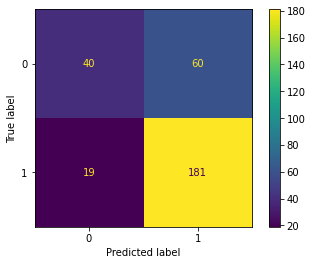

In [26]:
#matriz de confusão "visual"
plot_confusion_matrix(modelorf, X_teste, y_teste)

In [27]:
#acuacia
acuracia = accuracy_score(y_teste, previsoes_rf)
print(acuracia)

0.7366666666666667


In [28]:
#erro
erro = 1 - acuracia
print(erro)

0.2633333333333333


In [29]:
#recall
recall = recall_score(y_teste, previsoes_rf) 
print(recall)

0.905


In [30]:
#precision
precision = precision_score(y_teste, previsoes_rf) 
print(precision)

0.7510373443983402


75% do que foi classificado como bom, realmente era bom.

In [31]:
#f1
f1 = f1_score(y_teste, previsoes_rf) 
print(f1)

0.8208616780045352


In [32]:
#area under curve
auc = roc_auc_score(y_teste, previsoes_rf) 
auc

0.6525000000000001

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


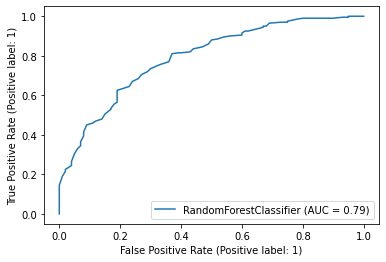

In [33]:
#plot roc
plot_roc_curve(modelorf, X_teste, y_teste) 

In [34]:
#log
log = log_loss(y_teste, previsoes_rf) 
log

9.09537103681252

quanto menor, melhor.